# **1.Import library**

In [ ]:
import nltk
import numpy as np
import pandas as pd
import spacy
import os
import random
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from time import perf_counter
stemmer=PorterStemmer()
nltk.download("punkt")
nltk.download("stopwords")
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 123456
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

mount with google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


retrieve data source

In [ ]:
# load data

#**2. Preporocessing - tokenizer and make TFI-df**

- Tokenizer , stemmatization , remove stop words , lower case alphabet

In [ ]:
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")
stemmer=PorterStemmer()

In [ ]:
 def preprocess_text(sentences) :   
  """ input  
        sentence : text
        output : list of string from corpus ( bow)
  """     
  words=[]  
  bows = []     
  phrase = sent_tokenize(sentences)
  for sentence in phrase:
              doc=nlp(sentence)
              for token in doc:
                 words.append(token.text)
              words = [word for word in words if word not in stopwords.words("english")]
              words = [stemmer.stem(word) for word in words]
              words = [word for word in words if word.isalpha()]
              bows = bows + words
  bows = [word.lower() for word in bows]
  bows =set(bows)
  bow = bows.intersection(set(list(nlp.vocab.strings)))
  bow = sorted(list(bow))
  return bow

import vectorizer library

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

split data : train / test

In [ ]:
X=df["text"]
y=df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200,stratify=y)

transform train data to vector

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer = preprocess_text,min_df=20,max_df=0.8,max_features=300)

In [ ]:
 X_train_vector = tfidf_vector.fit_transform(X_train)

transform test data to vector

In [ ]:
X_test_vector=  tfidf_vector.transform(X_test)

change categorical label to numeric label

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train_array=le.fit_transform(y_train)

#3. Train model with Logistic regression

3.1 Random search 

In [ ]:
#FOR logistic + randomserach
solvers = ['newton-cg', 'lbfgs']
penalty = ['l2']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
rand = dict(classifier__solver=solvers,classifier__penalty=penalty,classifier__C=c_values)
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',class_weight='balanced',multi_class='multinomial')
pipe = Pipeline([('classifier', classifier)],verbose=True)
search = RandomizedSearchCV(pipe, param_distributions=rand, n_iter=200)
search.fit(X_train_vector,y_train_array)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 14 is smaller than n_iter=200. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipel

3.2 Gridsearch

In [ ]:
#FOR logistic + gridserach
solvers = ['newton-cg']
penalty = ['l2']
c_values = [5,8,10,12,14]
rand = dict(classifier__solver=solvers,classifier__penalty=penalty,classifier__C=c_values)
from sklearn.model_selection import GridSearchCV 
classifier = LogisticRegression(class_weight='balanced',multi_class='multinomial')
pipe = Pipeline([('classifier', classifier)],verbose=True)
search = GridSearchCV(pipe, param_grid=rand, verbose=1)
search.fit(X_train_vector,y_train_array)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s
[Pipeline] ......

3.3 After finding optimal parameter, then train model with those parameters.

In [ ]:
#FOR logistic
LR = LogisticRegression(penalty='l2',class_weight='balanced',solver='newton-cg',multi_class='multinomial',C=8)
pipe = Pipeline([('classifier', LR)],verbose=True)
pipe.fit(X_train_vector,y_train_array)

[Pipeline] ........ (step 1 of 1) Processing classifier, total=   0.1s


Pipeline(steps=[('classifier',
                 LogisticRegression(C=8, class_weight='balanced',
                                    multi_class='multinomial',
                                    solver='newton-cg'))],
         verbose=True)

3.4 Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_test_array=le.transform(y_test)
predicted = pipe.predict(X_test_vector)
prob = pipe.predict_proba(X_test_vector)
auc = roc_auc_score(y_test_array,prob, average='weighted', multi_class='ovr')
print("Overall Accuracy:",accuracy_score(y_test_array, predicted))
print("Overall Precision(weight):",precision_score(y_test_array, predicted, average='weighted'))
print("Overall F1-score(weight):",f1_score(y_test_array, predicted, average='weighted'))
print("Overall Recall(weight):",recall_score(y_test_array, predicted, average='weighted'))
print('Average AUC:', auc)
y = le.inverse_transform(y_test_array)
y_predicted = le.inverse_transform(predicted)
print(classification_report(y, y_predicted))

Elapsed time during the whole program in seconds: 104.96436756000003
Elapsed time per sample in seconds: 0.2691394040000001
Overall Accuracy: 0.9666666666666667
Overall Precision(weight): 0.9671365156582546
Overall F1-score(weight): 0.9666496113897618
Overall Recall(weight): 0.9666666666666667
Average AUC: 0.9967445128722004
              precision    recall  f1-score   support

         LAB       0.97      0.94      0.96        71
         OTH       0.95      0.98      0.97       174
       PATHO       0.99      0.97      0.98        76
       RADIO       0.98      0.94      0.96        69

    accuracy                           0.97       390
   macro avg       0.97      0.96      0.97       390
weighted avg       0.97      0.97      0.97       390



confusion matrix

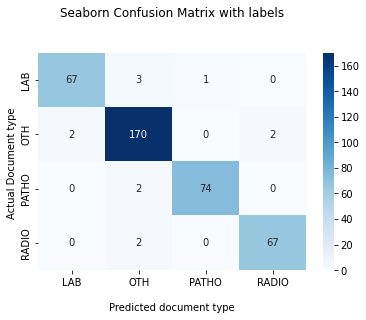

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test_array, predicted)
# Build graph
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted document type')
ax.set_ylabel('Actual Document type ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['LAB','OTH', 'PATHO','RADIO'])
ax.yaxis.set_ticklabels(['LAB','OTH', 'PATHO','RADIO'])

## Display the visualization of the Confusion Matrix.
plt.show()